In [1]:
import sys; sys.path.append('../')

In [2]:
open_ai_api= open("../openai_api_key.key", "r").read()
from agents import Agent, OpenAIChatGPT, set_global_llm, set_live_verbosity

set_live_verbosity(2)
openai_llm = OpenAIChatGPT(
    api_key=open_ai_api,
    model="gpt-4o-mini",
    temperature=0.7,
    top_p=0.9,
    max_tokens=2000
)

set_global_llm(openai_llm)

/Users/voldemort/Desktop/personal_projects/arc-mlu/notebooks/../notebooks/arc_helper.py:103: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


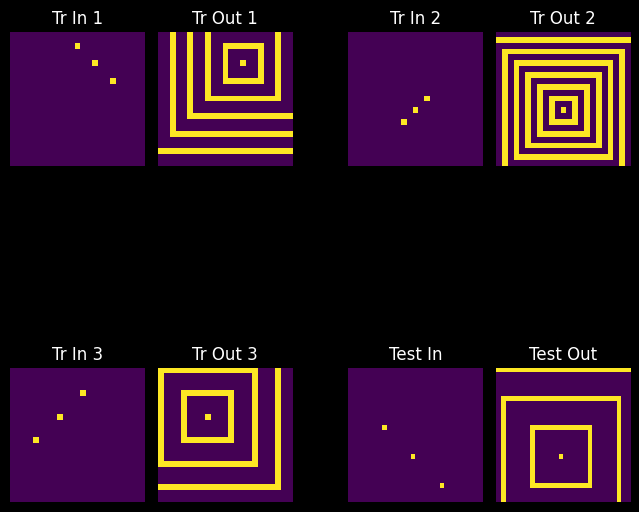

In [3]:
from notebooks.arc_helper import (convert_json_format, generate_string,
                                  plot_sample_matrices)

directory = "./ARC-800-tasks/training"  # Change this to your actual directory path
converted_data = convert_json_format(directory)
data=generate_string(converted_data)
plot_sample_matrices(converted_data[4])

In [4]:
from mlu import MLU

mlu = MLU(main_role="""
                    The goal is to construct the output grid(s) corresponding to the test input grid(s), 
                    using 3 trials for each test input. 'Constructing the output grid' involves picking 
                    the height and width of the output grid, then filling each cell in the grid with a symbol 
                    (integer between 0 and 9, which are visualized as colors). Learn to figure out the 
                    transformation rules and logic of image(matrix) from few given examples and apply it 
                    to the final test image(matrix). Analyze the given examples and predict the final 
                    image(matrix) for the given test image(matrix) and understand how to learn the 
                    transformation rules and logic of image(matrix) from few given examples to apply it 
                    to the final test image(matrix).
                    """,
    collection_name="knowledge_base_v-0.1",
    compress_knowledge=True,
    retrival_limit=15,
)

/opt/homebrew/Caskroom/miniconda/base/envs/voice-clone/lib/python3.10/site-packages/sentence_transformers/cross_encoder/CrossEncoder.py:11: TqdmExperimentalWarning: Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)
  from tqdm.autonotebook import tqdm, trange


In [6]:
from train_test_helper import train_and_evaluate

from logical_agents import logic_concept_reasoning_network

reasoning_iterations=4
reasoning_agent=lambda prompt,input: logic_concept_reasoning_network(f"{prompt}\n{input}", max_iterations=reasoning_iterations)

set_live_verbosity(2)

n = 10 # 10 
import random

selected_data = random.sample(data, n)

results, train_dtw_scores, test_dtw_scores=train_and_evaluate(
    dataset=selected_data,  
    mlu=mlu,
    prompt_key="query",
    response_key="reply",
    epochs=1,
    test_size=0,
    train_batch_size=1,
    test_batch_size=1,
    initial_serial_items=1,
    logging=True,
    training_analysis_agent = reasoning_agent,
    testing_analysis_agent = reasoning_agent,
)


Starting Epoch 1



Training:   0%|          | 0/10 [00:00<?, ?it/s]

╭─────────────────────────────────────────────────────────────────────────────────────────────────────────────────╮
│ 🤖 Agent: SearchAgent                                                                                           │
│ ├── ⏩ Input:                                                                                                   │
│ │   ├── Query: if image_1:                                                                                      │
│ │   ├── [[0, 0, 0, 0, 8, 0, 0, 0, 0, 0, 0, 8, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 8, 0, 0, 0, 0, 0, 0, 8, 0, 0,  │
│ │   │   0, 0, 0, 0, 0], [8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8], [0, 0, 0, 0, 8, 0, 0, 0, 0,  │
│ │   │   0, 0, 8, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 8, 0, 0, 0, 0, 0, 0, 8, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0,  │
│ │   │   8, 0, 0, 0, 0, 0, 0, 8, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 8, 0, 0, 0, 0, 0, 0, 8, 0, 0, 0, 0, 0, 0,    │
│ │   │   0], [8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8], [0, 0, 0, 0, 8, 0, 0, 0, 0, 0, 0, 8, 0,  │
│ │   │   0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 8, 0, 0, 0, 0, 0, 0, 8, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 8, 0, 0, 0,  │
│ │   │   0, 0, 0, 8, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 8, 0, 0, 0, 0, 0, 0, 8, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0,  │
│ │   │   0, 8, 0, 0, 0, 0, 0, 0, 8, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 8, 0, 0, 0, 0, 0, 0, 8, 0, 0, 0, 0, 0, 0, │
│ │   │   0], [0, 0, 0, 0, 8, 0, 0, 0, 0, 0, 0, 8, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 8, 0, 0, 0, 0, 0, 0, 8, 0,  │
│ │   │   0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 8, 0, 0, 0, 0, 0, 0, 8, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 8, 0, 0, 0,  │
│ │   │   0, 0, 0, 8, 0, 0, 0, 0, 0, 0, 0]] is transformed as                                                     │
│ │   ├── [[0, 0, 0, 0, 8, 2, 2, 2, 2, 2, 2, 8, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 8, 2, 2, 2, 2, 2, 2, 8, 0, 0,  │
│ │   │   0, 0, 0, 0, 0], [8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8], [4, 4, 4, 4, 8, 6, 6, 6, 6,  │
│ │   │   6, 6, 8, 3, 3, 3, 3, 3, 3, 3], [4, 4, 4, 4, 8, 6, 6, 6, 6, 6, 6, 8, 3, 3, 3, 3, 3, 3, 3], [4, 4, 4, 4,  │
│ │   │   8, 6, 6, 6, 6, 6, 6, 8, 3, 3, 3, 3, 3, 3, 3], [4, 4, 4, 4, 8, 6, 6, 6, 6, 6, 6, 8, 3, 3, 3, 3, 3, 3,    │
│ │   │   3], [8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8], [0, 0, 0, 0, 8, 1, 1, 1, 1, 1, 1, 8, 0,  │
│ │   │   0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 8, 1, 1, 1, 1, 1, 1, 8, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 8, 1, 1, 1,  │
│ │   │   1, 1, 1, 8, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 8, 1, 1, 1, 1, 1, 1, 8, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0,  │
│ │   │   0, 8, 1, 1, 1, 1, 1, 1, 8, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 8, 1, 1, 1, 1, 1, 1, 8, 0, 0, 0, 0, 0, 0, │
│ │   │   0], [0, 0, 0, 0, 8, 1, 1, 1, 1, 1, 1, 8, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 8, 1, 1, 1, 1, 1, 1, 8, 0,  │
│ │   │   0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 8, 1, 1, 1, 1, 1, 1, 8, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 8, 1, 1, 1,  │
│ │   │   1, 1, 1, 8, 0, 0, 0, 0, 0, 0, 0]]                                                                       │
│ │   ├── if image_2:                                                                                             │
│ │   ├── [[0, 0, 8, 0, 0, 0, 0, 0, 0, 8, 0, 0, 0, 0], [0, 0, 8, 0, 0, 0, 0, 0, 0, 8, 0, 0, 0, 0], [0, 0, 8, 0,   │
│ │   │   0, 0, 0, 0, 0, 8, 0, 0, 0, 0], [0, 0, 8, 0, 0, 0, 0, 0, 0, 8, 0, 0, 0, 0], [8, 8, 8, 8, 8, 8, 8, 8, 8,  │
│ │   │   8, 8, 8, 8, 8], [0, 0, 8, 0, 0, 0, 0, 0, 0, 8, 0, 0, 0, 0], [0, 0, 8, 0, 0, 0, 0, 0, 0, 8, 0, 0, 0, 0], │
│ │   │   [8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8], [0, 0, 8, 0, 0, 0, 0, 0, 0, 8, 0, 0, 0, 0], [0, 0, 8, 0, 0, │
│ │   │   0, 0, 0, 0, 8, 0, 0, 0, 0], [0, 0, 8, 0, 0, 0, 0, 0, 0, 8, 0, 0, 0, 0], [0, 0, 8, 0, 0, 0, 0, 0, 0, 8,  │
│ │   │   0, 0, 0, 0]] is transformed as                                                                          │
│ │   ├── [[0, 0, 8, 2, 2, 2, 2, 2, 2, 8, 0, 0, 0, 0], [0, 0, 8, 2, 2, 2, 2, 2, 2, 8, 0, 0, 0, 0], [0, 0, 8, 2,   │
│ │   │   2, 2, 2, 2, 2, 8, 0, 0, 0, 0], [0, 0, 8, 2, 2, 2

Number of requested results 15 is greater than number of elements in index 1, updating n_results = 1


╭─────────────────────────────────────────────────────────────────────────────────────────────────────────────────╮
│ 🤖 Agent: MetaPromptAgent                                                                                       │
│ ├── ⏩ Input:                                                                                                   │
│ │   ├──                                                                                                         │
│ │   ├──         Main Goal:                                                                                      │
│ │   ├──                     The goal is to construct the output grid(s) corresponding to the test input         │
│ │   │   grid(s),                                                                                                │
│ │   ├──                     using 3 trials for each test input. 'Constructing the output grid' involves picking │
│ │   ├──                     the height and width of the output grid, then filling each cell in the grid with a  │
│ │   │   symbol                                                                                                  │
│ │   ├──                     (integer between 0 and 9, which are visualized as colors). Learn to figure out the  │
│ │   ├──                     transformation rules and logic of image(matrix) from few given examples and apply   │
│ │   │   it                                                                                                      │
│ │   ├──                     to the final test image(matrix). Analyze the given examples and predict the final   │
│ │   ├──                     image(matrix) for the given test image(matrix) and understand how to learn the      │
│ │   ├──                     transformation rules and logic of image(matrix) from few given examples to apply it │
│ │   ├──                     to the final test image(matrix).                                                    │
│ │   ├──                                                                                                         │
│ │   ├──         Task: if image_1:                                                                               │
│ │   ├── [[0, 0, 0, 0, 8, 0, 0, 0, 0, 0, 0, 8, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 8, 0, 0, 0, 0, 0, 0, 8, 0, 0,  │
│ │   │   0, 0, 0, 0, 0], [8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8], [0, 0, 0, 0, 8, 0, 0, 0, 0,  │
│ │   │   0, 0, 8, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 8, 0, 0, 0, 0, 0, 0, 8, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0,  │
│ │   │   8, 0, 0, 0, 0, 0, 0, 8, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 8, 0, 0, 0, 0, 0, 0, 8, 0, 0, 0, 0, 0, 0,    │
│ │   │   0], [8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8], [0, 0, 0, 0, 8, 0, 0, 0, 0, 0, 0, 8, 0,  │
│ │   │   0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 8, 0, 0, 0, 0, 0, 0, 8, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 8, 0, 0, 0,  │
│ │   │   0, 0, 0, 8, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 8, 0, 0, 0, 0, 0, 0, 8, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0,  │
│ │   │   0, 8, 0, 0, 0, 0, 0, 0, 8, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 8, 0, 0, 0, 0, 0, 0, 8, 0, 0, 0, 0, 0, 0, │
│ │   │   0], [0, 0, 0, 0, 8, 0, 0, 0, 0, 0, 0, 8, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 8, 0, 0, 0, 0, 0, 0, 8, 0,  │
│ │   │   0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 8, 0, 0, 0, 0, 0, 0, 8, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 8, 0, 0, 0,  │
│ │   │   0, 0, 0, 8, 0, 0, 0, 0, 0, 0, 0]] is transformed as                                                     │
│ │   ├── [[0, 0, 0, 0, 8, 2, 2, 2, 2, 2, 2, 8, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 8, 2, 2, 2, 2, 2, 2, 8, 0, 0,  │
│ │   │   0, 0, 0, 0, 0], [8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8], [4, 4, 4, 4, 8, 6, 6, 6, 6,  │
│ │   │   6, 6, 8, 3, 3, 3, 3, 3, 3, 3], [4, 4, 4, 4, 8, 6, 6, 6, 6, 6, 6, 8, 3, 3, 3, 3, 3, 3, 3], [4, 4, 4, 4,  │
│ │   │   8, 6, 6, 6, 6, 6, 6, 8, 3, 3, 3, 3, 3, 3, 3], [4, 4, 4, 4, 8, 6, 6, 6, 6, 6, 6, 8, 3, 3, 3, 3, 3, 3,    │
│ │   │   3], [8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8

╭─────────────────────────────────────────────────────────────────────────────────────────────────────────────────╮
│ 🤖 Agent: SearchAgent                                                                                           │
│ ├── ⏩ Input:                                                                                                   │
│ │   ├── Query:                                                                                                  │
│ │   ├──         Main Goal:                                                                                      │
│ │   ├──                     The goal is to construct the output grid(s) corresponding to the test input         │
│ │   │   grid(s),                                                                                                │
│ │   ├──                     using 3 trials for each test input. 'Constructing the output grid' involves picking │
│ │   ├──                     the height and width of the output grid, then filling each cell in the grid with a  │
│ │   │   symbol                                                                                                  │
│ │   ├──                     (integer between 0 and 9, which are visualized as colors). Learn to figure out the  │
│ │   ├──                     transformation rules and logic of image(matrix) from few given examples and apply   │
│ │   │   it                                                                                                      │
│ │   ├──                     to the final test image(matrix). Analyze the given examples and predict the final   │
│ │   ├──                     image(matrix) for the given test image(matrix) and understand how to learn the      │
│ │   ├──                     transformation rules and logic of image(matrix) from few given examples to apply it │
│ │   ├──                     to the final test image(matrix).                                                    │
│ │   ├──                                                                                                         │
│ │   ├──         Task: if image_1:                                                                               │
│ │   ├── [[0, 0, 0, 0, 8, 0, 0, 0, 0, 0, 0, 8, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 8, 0, 0, 0, 0, 0, 0, 8, 0, 0,  │
│ │   │   0, 0, 0, 0, 0], [8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8], [0, 0, 0, 0, 8, 0, 0, 0, 0,  │
│ │   │   0, 0, 8, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 8, 0, 0, 0, 0, 0, 0, 8, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0,  │
│ │   │   8, 0, 0, 0, 0, 0, 0, 8, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 8, 0, 0, 0, 0, 0, 0, 8, 0, 0, 0, 0, 0, 0,    │
│ │   │   0], [8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8], [0, 0, 0, 0, 8, 0, 0, 0, 0, 0, 0, 8, 0,  │
│ │   │   0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 8, 0, 0, 0, 0, 0, 0, 8, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 8, 0, 0, 0,  │
│ │   │   0, 0, 0, 8, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 8, 0, 0, 0, 0, 0, 0, 8, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0,  │
│ │   │   0, 8, 0, 0, 0, 0, 0, 0, 8, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 8, 0, 0, 0, 0, 0, 0, 8, 0, 0, 0, 0, 0, 0, │
│ │   │   0], [0, 0, 0, 0, 8, 0, 0, 0, 0, 0, 0, 8, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 8, 0, 0, 0, 0, 0, 0, 8, 0,  │
│ │   │   0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 8, 0, 0, 0, 0, 0, 0, 8, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 8, 0, 0, 0,  │
│ │   │   0, 0, 0, 8, 0, 0, 0, 0, 0, 0, 0]] is transformed as                                                     │
│ │   ├── [[0, 0, 0, 0, 8, 2, 2, 2, 2, 2, 2, 8, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 8, 2, 2, 2, 2, 2, 2, 8, 0, 0,  │
│ │   │   0, 0, 0, 0, 0], [8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8], [4, 4, 4, 4, 8, 6, 6, 6, 6,  │
│ │   │   6, 6, 8, 3, 3, 3, 3, 3, 3, 3], [4, 4, 4, 4, 8, 6, 6, 6, 6, 6, 6, 8, 3, 3, 3, 3, 3, 3, 3], [4, 4, 4, 4,  │
│ │   │   8, 6, 6, 6, 6, 6, 6, 8, 3, 3, 3, 3, 3, 3, 3], [4, 4, 4, 4, 8, 6, 6, 6, 6, 6, 6, 8, 3, 3, 3, 3, 3, 3,    │
│ │   │   3], [8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8

Number of requested results 15 is greater than number of elements in index 1, updating n_results = 1


╭─────────────────────────────────────────────────────────────────────────────────────────────────────────────────╮
│ 🤖 Agent: ConceptAnalyzer                                                                                       │
│ ├── ⏩ Input:                                                                                                   │
│ │   ├── Problem: You are an Operational Agent tasked with transforming input grids into output grids based on   │
│ │   │   learned transformation rules from given examples. Your responsibilities include: 1) Analyzing           │
│ │   │   transformation patterns from provided input-output grid examples to identify how values shift and       │
│ │   │   change, ensuring a clear understanding of the logic behind these transformations. 2) Applying these     │
│ │   │   rules accurately to construct an output grid for new test inputs while maintaining the original grid    │
│ │   │   dimensions unless specified otherwise. 3) Conducting three trials for each test input to ensure the     │
│ │   │   accuracy and reliability of the output.                                                                 │
│ │   ├──                                                                                                         │
│ │   ├── For the current task, analyze the provided input grid:                                                  │
│ │   ├── [[0, 0, 0, 8, 0, 0, 0, 0, 8, 0, 0, 0, 0, 0, 0], [0, 0, 0, 8, 0, 0, 0, 0, 8, 0, 0, 0, 0, 0, 0], [0, 0,   │
│ │   │   0, 8, 0, 0, 0, 0, 8, 0, 0, 0, 0, 0, 0], [0, 0, 0, 8, 0, 0, 0, 0, 8, 0, 0, 0, 0, 0, 0], [0, 0, 0, 8, 0,  │
│ │   │   0, 0, 0, 8, 0, 0, 0, 0, 0, 0], [0, 0, 0, 8, 0, 0, 0, 0, 8, 0, 0, 0, 0, 0, 0], [8, 8, 8, 8, 8, 8, 8, 8,  │
│ │   │   8, 8, 8, 8, 8, 8, 8], [0, 0, 0, 8, 0, 0, 0, 0, 8, 0, 0, 0, 0, 0, 0], [0, 0, 0, 8, 0, 0, 0, 0, 8, 0, 0,  │
│ │   │   0, 0, 0, 0], [0, 0, 0, 8, 0, 0, 0, 0, 8, 0, 0, 0, 0, 0, 0], [0, 0, 0, 8, 0, 0, 0, 0, 8, 0, 0, 0, 0, 0,  │
│ │   │   0], [0, 0, 0, 8, 0, 0, 0, 0, 8, 0, 0, 0, 0, 0, 0], [8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8], [0,   │
│ │   │   0, 0, 8, 0, 0, 0, 0, 8, 0, 0, 0, 0, 0, 0], [0, 0, 0, 8, 0, 0, 0, 0, 8, 0, 0, 0, 0, 0, 0]]               │
│ │   ├──                                                                                                         │
│ │   ├── Utilize the transformation rules identified from previous examples to predict and construct the         │
│ │   │   corresponding output grid. Pay special attention to consistent transformation patterns, value           │
│ │   │   movements, and placements across grids to avoid errors as seen in previous tasks. Your final output     │
│ │   │   should reflect a careful application of these rules.                                                    │
│ │   ├──                                                                                                         │
│ │   ├──         Task: if image_1:                                                                               │
│ │   ├── [[0, 0, 0, 0, 8, 0, 0, 0, 0, 0, 0, 8, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 8, 0, 0, 0, 0, 0, 0, 8, 0, 0,  │
│ │   │   0, 0, 0, 0, 0], [8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8], [0, 0, 0, 0, 8, 0, 0, 0, 0,  │
│ │   │   0, 0, 8, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 8, 0, 0, 0, 0, 0, 0, 8, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0,  │
│ │   │   8, 0, 0, 0, 0, 0, 0, 8, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 8, 0, 0, 0, 0, 0, 0, 8, 0, 0, 0, 0, 0, 0,    │
│ │   │   0], [8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8], [0, 0, 0, 0, 8, 0, 0, 0, 0, 0, 0, 8, 0,  │
│ │   │   0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 8, 0, 0, 0, 0, 0, 0, 8, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 8, 0, 0, 0,  │
│ │   │   0, 0, 0, 8, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 8, 0, 0, 0, 0, 0, 0, 8, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0,  │
│ │   │   0, 8, 0, 0, 0, 0, 0, 0, 8, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 8, 0, 0, 0, 0, 0, 0, 8, 0, 0, 0, 0, 0, 0, │
│ │   │   0], [0, 0, 0, 0, 8, 0, 0, 0, 0, 0, 0, 8, 0, 0, 0

╭─────────────────────────────────────────────────────────────────────────────────────────────────────────────────╮
│ 🤖 Agent: LogicalReasoner                                                                                       │
│ ├── ⏩ Input:                                                                                                   │
│ │   ├── Problem: You are an Operational Agent tasked with transforming input grids into output grids based on   │
│ │   │   learned transformation rules from given examples. Your responsibilities include: 1) Analyzing           │
│ │   │   transformation patterns from provided input-output grid examples to identify how values shift and       │
│ │   │   change, ensuring a clear understanding of the logic behind these transformations. 2) Applying these     │
│ │   │   rules accurately to construct an output grid for new test inputs while maintaining the original grid    │
│ │   │   dimensions unless specified otherwise. 3) Conducting three trials for each test input to ensure the     │
│ │   │   accuracy and reliability of the output.                                                                 │
│ │   ├──                                                                                                         │
│ │   ├── For the current task, analyze the provided input grid:                                                  │
│ │   ├── [[0, 0, 0, 8, 0, 0, 0, 0, 8, 0, 0, 0, 0, 0, 0], [0, 0, 0, 8, 0, 0, 0, 0, 8, 0, 0, 0, 0, 0, 0], [0, 0,   │
│ │   │   0, 8, 0, 0, 0, 0, 8, 0, 0, 0, 0, 0, 0], [0, 0, 0, 8, 0, 0, 0, 0, 8, 0, 0, 0, 0, 0, 0], [0, 0, 0, 8, 0,  │
│ │   │   0, 0, 0, 8, 0, 0, 0, 0, 0, 0], [0, 0, 0, 8, 0, 0, 0, 0, 8, 0, 0, 0, 0, 0, 0], [8, 8, 8, 8, 8, 8, 8, 8,  │
│ │   │   8, 8, 8, 8, 8, 8, 8], [0, 0, 0, 8, 0, 0, 0, 0, 8, 0, 0, 0, 0, 0, 0], [0, 0, 0, 8, 0, 0, 0, 0, 8, 0, 0,  │
│ │   │   0, 0, 0, 0], [0, 0, 0, 8, 0, 0, 0, 0, 8, 0, 0, 0, 0, 0, 0], [0, 0, 0, 8, 0, 0, 0, 0, 8, 0, 0, 0, 0, 0,  │
│ │   │   0], [0, 0, 0, 8, 0, 0, 0, 0, 8, 0, 0, 0, 0, 0, 0], [8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8], [0,   │
│ │   │   0, 0, 8, 0, 0, 0, 0, 8, 0, 0, 0, 0, 0, 0], [0, 0, 0, 8, 0, 0, 0, 0, 8, 0, 0, 0, 0, 0, 0]]               │
│ │   ├──                                                                                                         │
│ │   ├── Utilize the transformation rules identified from previous examples to predict and construct the         │
│ │   │   corresponding output grid. Pay special attention to consistent transformation patterns, value           │
│ │   │   movements, and placements across grids to avoid errors as seen in previous tasks. Your final output     │
│ │   │   should reflect a careful application of these rules.                                                    │
│ │   ├──                                                                                                         │
│ │   ├──         Task: if image_1:                                                                               │
│ │   ├── [[0, 0, 0, 0, 8, 0, 0, 0, 0, 0, 0, 8, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 8, 0, 0, 0, 0, 0, 0, 8, 0, 0,  │
│ │   │   0, 0, 0, 0, 0], [8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8], [0, 0, 0, 0, 8, 0, 0, 0, 0,  │
│ │   │   0, 0, 8, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 8, 0, 0, 0, 0, 0, 0, 8, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0,  │
│ │   │   8, 0, 0, 0, 0, 0, 0, 8, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 8, 0, 0, 0, 0, 0, 0, 8, 0, 0, 0, 0, 0, 0,    │
│ │   │   0], [8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8], [0, 0, 0, 0, 8, 0, 0, 0, 0, 0, 0, 8, 0,  │
│ │   │   0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 8, 0, 0, 0, 0, 0, 0, 8, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 8, 0, 0, 0,  │
│ │   │   0, 0, 0, 8, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 8, 0, 0, 0, 0, 0, 0, 8, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0,  │
│ │   │   0, 8, 0, 0, 0, 0, 0, 0, 8, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 8, 0, 0, 0, 0, 0, 0, 8, 0, 0, 0, 0, 0, 0, │
│ │   │   0], [0, 0, 0, 0, 8, 0, 0, 0, 0, 0, 0, 8, 0, 0, 0

╭─────────────────────────────────────────────────────────────────────────────────────────────────────────────────╮
│ 🤖 Agent: SolutionFormulator                                                                                    │
│ ├── ⏩ Input:                                                                                                   │
│ │   ├── Problem: You are an Operational Agent tasked with transforming input grids into output grids based on   │
│ │   │   learned transformation rules from given examples. Your responsibilities include: 1) Analyzing           │
│ │   │   transformation patterns from provided input-output grid examples to identify how values shift and       │
│ │   │   change, ensuring a clear understanding of the logic behind these transformations. 2) Applying these     │
│ │   │   rules accurately to construct an output grid for new test inputs while maintaining the original grid    │
│ │   │   dimensions unless specified otherwise. 3) Conducting three trials for each test input to ensure the     │
│ │   │   accuracy and reliability of the output.                                                                 │
│ │   ├──                                                                                                         │
│ │   ├── For the current task, analyze the provided input grid:                                                  │
│ │   ├── [[0, 0, 0, 8, 0, 0, 0, 0, 8, 0, 0, 0, 0, 0, 0], [0, 0, 0, 8, 0, 0, 0, 0, 8, 0, 0, 0, 0, 0, 0], [0, 0,   │
│ │   │   0, 8, 0, 0, 0, 0, 8, 0, 0, 0, 0, 0, 0], [0, 0, 0, 8, 0, 0, 0, 0, 8, 0, 0, 0, 0, 0, 0], [0, 0, 0, 8, 0,  │
│ │   │   0, 0, 0, 8, 0, 0, 0, 0, 0, 0], [0, 0, 0, 8, 0, 0, 0, 0, 8, 0, 0, 0, 0, 0, 0], [8, 8, 8, 8, 8, 8, 8, 8,  │
│ │   │   8, 8, 8, 8, 8, 8, 8], [0, 0, 0, 8, 0, 0, 0, 0, 8, 0, 0, 0, 0, 0, 0], [0, 0, 0, 8, 0, 0, 0, 0, 8, 0, 0,  │
│ │   │   0, 0, 0, 0], [0, 0, 0, 8, 0, 0, 0, 0, 8, 0, 0, 0, 0, 0, 0], [0, 0, 0, 8, 0, 0, 0, 0, 8, 0, 0, 0, 0, 0,  │
│ │   │   0], [0, 0, 0, 8, 0, 0, 0, 0, 8, 0, 0, 0, 0, 0, 0], [8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8], [0,   │
│ │   │   0, 0, 8, 0, 0, 0, 0, 8, 0, 0, 0, 0, 0, 0], [0, 0, 0, 8, 0, 0, 0, 0, 8, 0, 0, 0, 0, 0, 0]]               │
│ │   ├──                                                                                                         │
│ │   ├── Utilize the transformation rules identified from previous examples to predict and construct the         │
│ │   │   corresponding output grid. Pay special attention to consistent transformation patterns, value           │
│ │   │   movements, and placements across grids to avoid errors as seen in previous tasks. Your final output     │
│ │   │   should reflect a careful application of these rules.                                                    │
│ │   ├──                                                                                                         │
│ │   ├──         Task: if image_1:                                                                               │
│ │   ├── [[0, 0, 0, 0, 8, 0, 0, 0, 0, 0, 0, 8, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 8, 0, 0, 0, 0, 0, 0, 8, 0, 0,  │
│ │   │   0, 0, 0, 0, 0], [8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8], [0, 0, 0, 0, 8, 0, 0, 0, 0,  │
│ │   │   0, 0, 8, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 8, 0, 0, 0, 0, 0, 0, 8, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0,  │
│ │   │   8, 0, 0, 0, 0, 0, 0, 8, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 8, 0, 0, 0, 0, 0, 0, 8, 0, 0, 0, 0, 0, 0,    │
│ │   │   0], [8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8], [0, 0, 0, 0, 8, 0, 0, 0, 0, 0, 0, 8, 0,  │
│ │   │   0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 8, 0, 0, 0, 0, 0, 0, 8, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 8, 0, 0, 0,  │
│ │   │   0, 0, 0, 8, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 8, 0, 0, 0, 0, 0, 0, 8, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0,  │
│ │   │   0, 8, 0, 0, 0, 0, 0, 0, 8, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 8, 0, 0, 0, 0, 0, 0, 8, 0, 0, 0, 0, 0, 0, │
│ │   │   0], [0, 0, 0, 0, 8, 0, 0, 0, 0, 0, 0, 8, 0, 0, 0

Training:   0%|          | 0/10 [01:00<?, ?it/s]


KeyboardInterrupt: 

In [ ]:
print(train_dtw_scores, test_dtw_scores)